# ACCESS-OM2-025 Comparison

This notebook compares our first pre-release of ACCESS-OM2 with our (hopefully final) ACCESS-OM2 Pre-release, implemented at 0.25°.

We have also added a GM+Redi and a Redi case to the mix. These experiments are designed to explore the role of crude eddy parameterisation at 0.25°.


## Current Status


|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|025deg_jra55_ryf_spinup7 | JRA55 V1.1 RYF9091| Original simulation  | Stopped after 150 years. | 
|025deg_jra55v13_ryf8485_spinup_A | JRA55 V1.3 RYF8485|  An RYF8485 case with new model. | 60 years.| 
|025deg_jra55v13_ryf8485_gmredi | JRA55 V1.3 RYF8485|  As for the spinup case with both GM and Redi (300m^2/s) switched on. | 6 years.| 
|025deg_jra55v13_ryf8485_redi | JRA55 V1.3 RYF8485|  As for the spinup case with Redi diffusion (300m^2/s) switched on, but no GM. | Trying to start.| 

### Notes

**Last updated 29 November 2017**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

netcdf_index loaded.


In [2]:
import importlib

In [3]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 34574:127.0.0.1:34574 vdi-n14.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:45138 Dashboard: http://127.0.0.1:34574,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [4]:
cc.build_index()


Found 3720 new variables
Saving results in database...
Indexing complete.


True

In [2]:
configuration = 'access-om2-025'
expts = cc.get_experiments(configuration)
display(expts)

['025deg_jra55_ryf_broadwell_test',
 '025deg_jra55_ryf_spinup1',
 '025deg_jra55_ryf_spinup2',
 '025deg_jra55_ryf_spinup3',
 '025deg_jra55_ryf_spinup4',
 '025deg_jra55_ryf_spinup5',
 '025deg_jra55_ryf_spinup6',
 '025deg_jra55_ryf_spinup7',
 '025deg_jra55_ryf_spinup7_RCP45',
 '025deg_jra55v13_ryf8485_gmredi',
 '025deg_jra55v13_ryf8485_spinup_A']

## Experiments

In [2]:
# This subset of cases are the important ones
esub = ['025deg_jra55_ryf_spinup7',
 '025deg_jra55v13_ryf8485_spinup_A',
 '025deg_jra55v13_ryf8485_gmredi',
# '025deg_jra55v13_ryf8485_redi',
       ]

## Wind Stress
Just a simple plot showing zonally averaged zonal wind stress from each case.

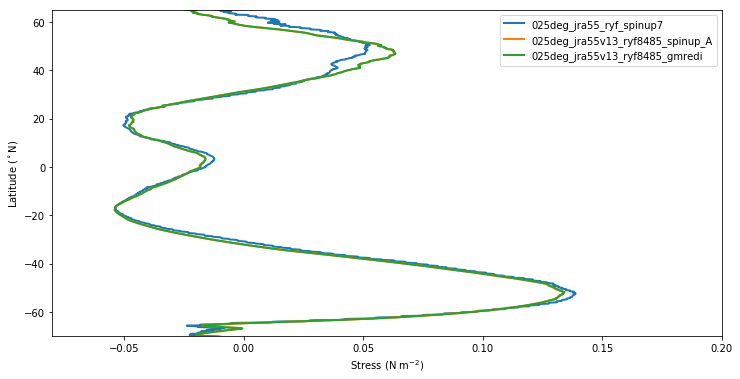

In [7]:
cc.plots.wind_stress(esub)

## Ocean Scalars
The following series of plots shows global timeseries of key metrics.

In [8]:
# If you want to clear stuff
#cc.diagnostics.annual_scalar.clear()

In [9]:
variables = ['temp_global_ave', 
             'salt_global_ave',
             'salt_surface_ave',
             'total_ocean_sfc_salt_flux_coupler',
             'eta_global']

plots.annual_scalar() can can take multiple variables at once (producing one figure per variable).  Internally, this is faster than plotting each scalar variable separately because the netCDF files are accessed only once for all the variables at once.

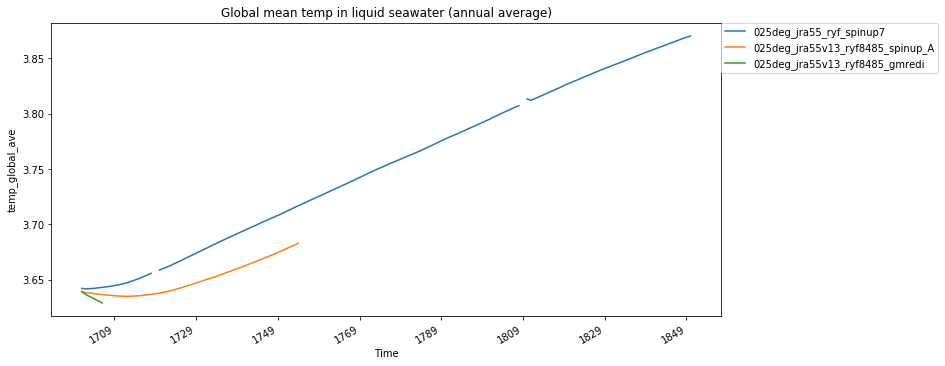

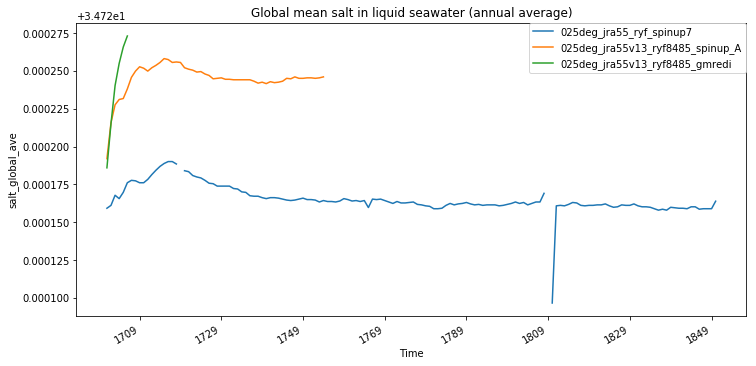

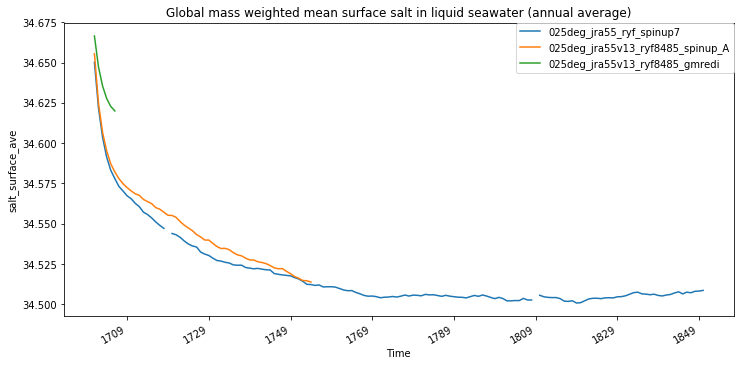

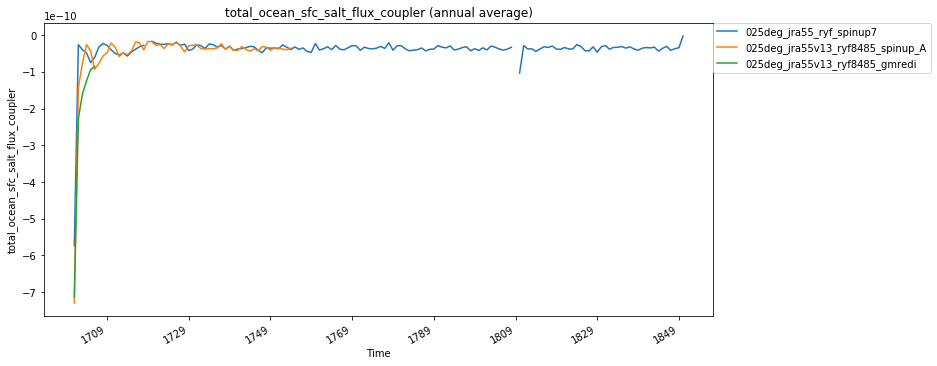

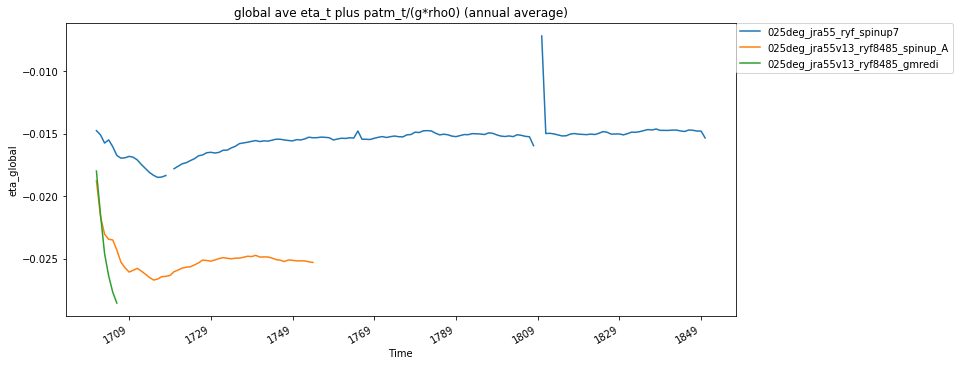

In [10]:
cc.plots.annual_scalar(esub, variables)

# Drake Passage Transport

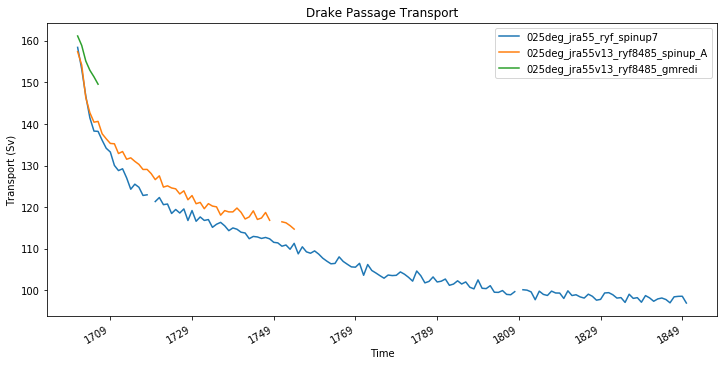

In [7]:
cc.plots.drake_passage(esub)

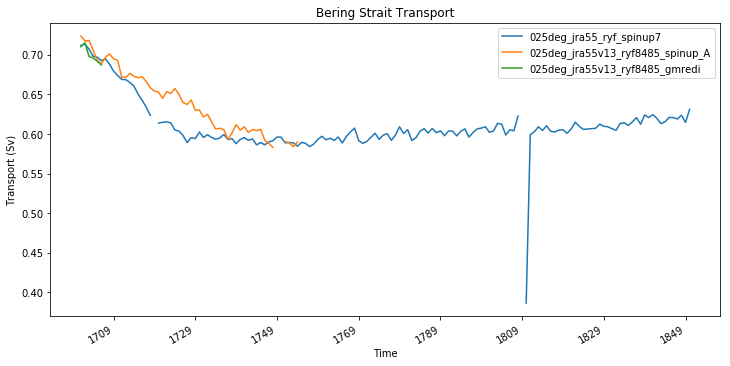

In [8]:
cc.plots.bering_strait(esub)

# Meridional Overturning Circulation

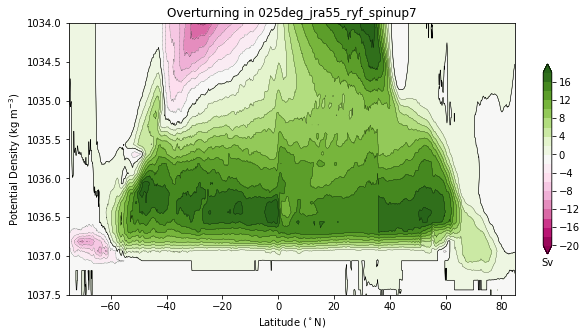

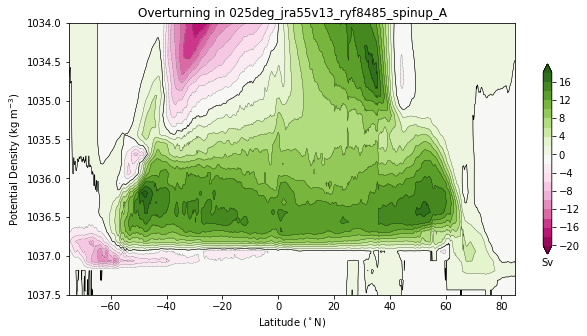

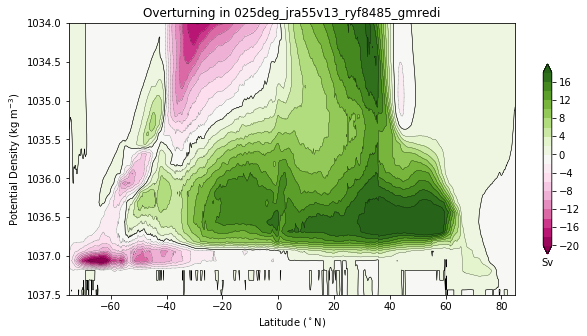

In [3]:
cc.plots.psi_avg(esub, 5)

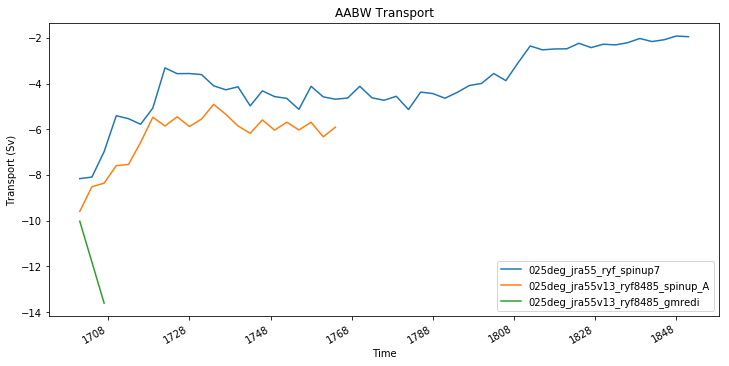

In [9]:
cc.plots.aabw(esub)

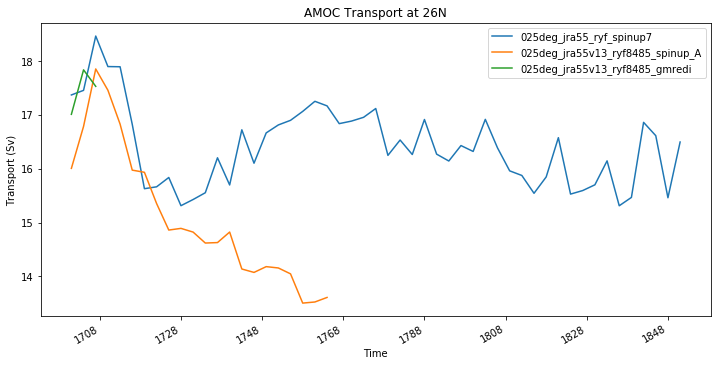

In [10]:
cc.plots.amoc(esub)

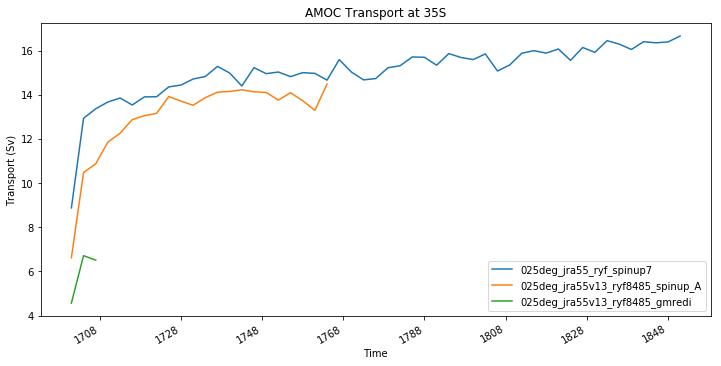

In [11]:
cc.plots.amoc_south(esub)

# Sea Surface Temperature
LH column shows SST, RH column shows difference from WOA13 long-term average.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


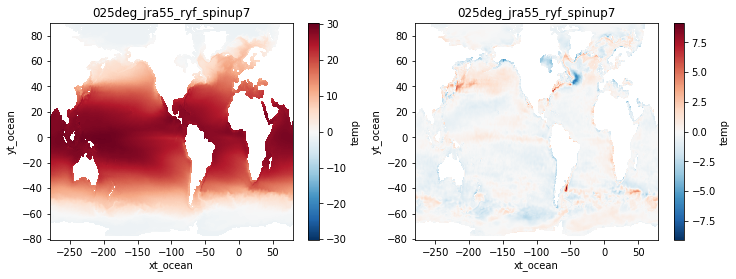

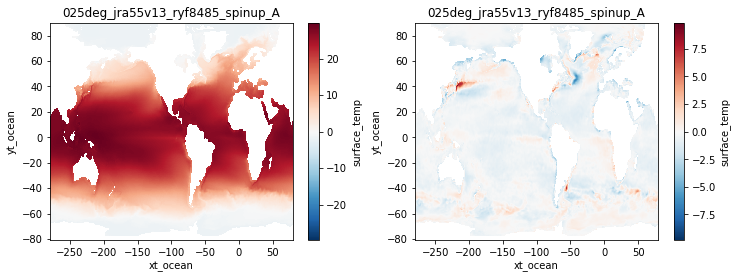

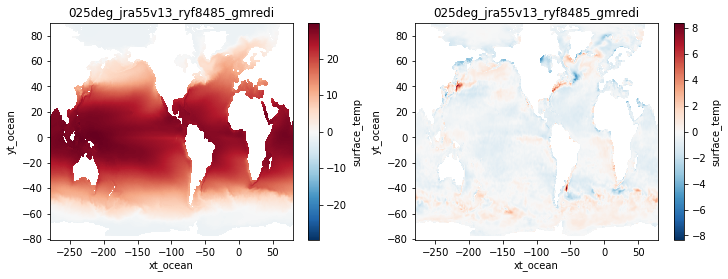

In [3]:
cc.plots.sea_surface_temperature(esub, resolution=0.25)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


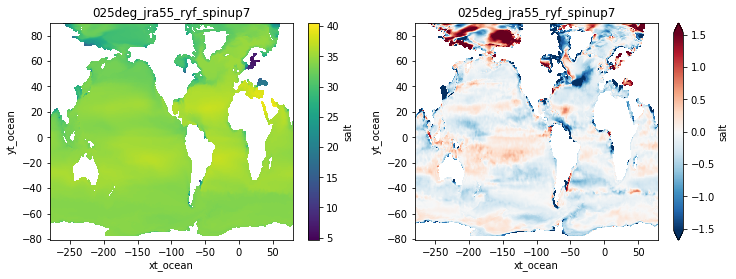

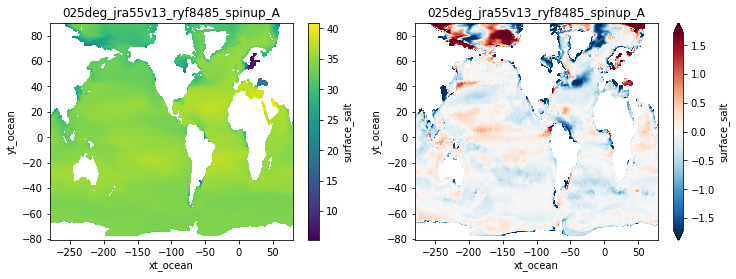

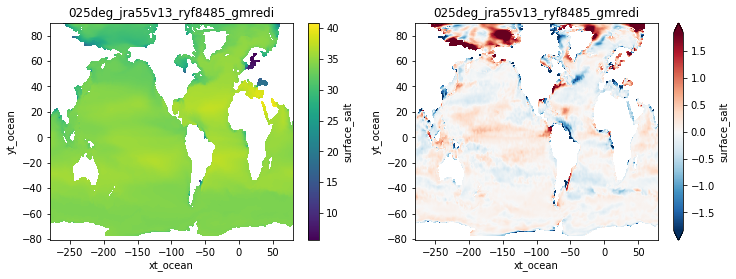

In [4]:
cc.plots.sea_surface_salinity(esub, resolution=0.25)

# Zonal Mean transects

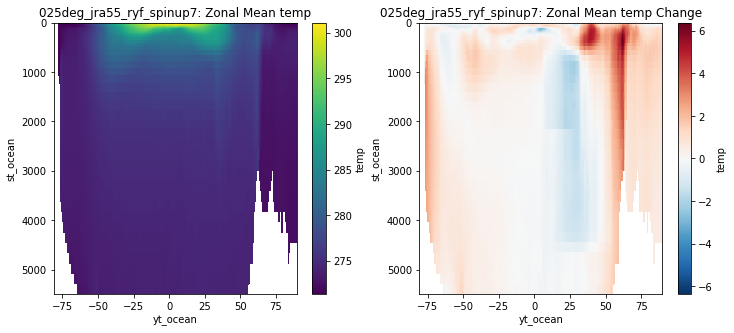

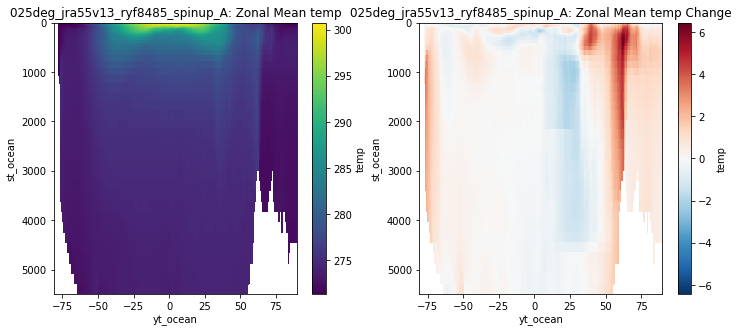

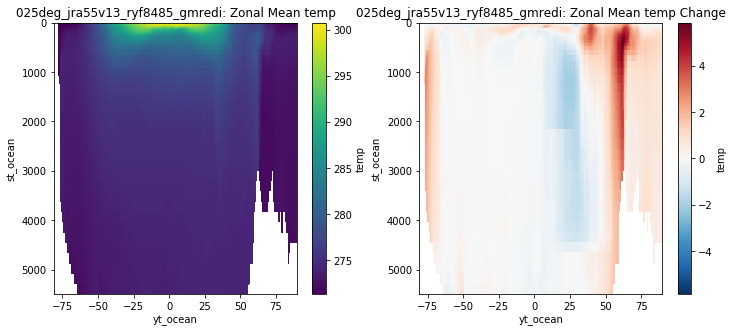

In [3]:
cc.plots.zonal_mean(esub,'temp',resolution=0.25)

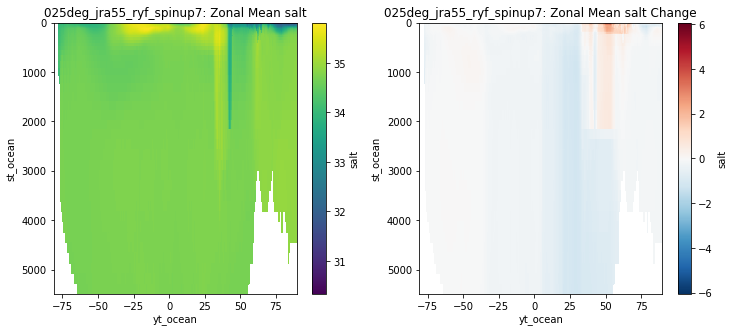

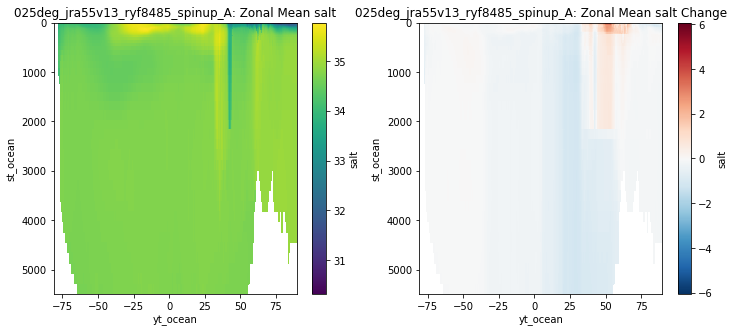

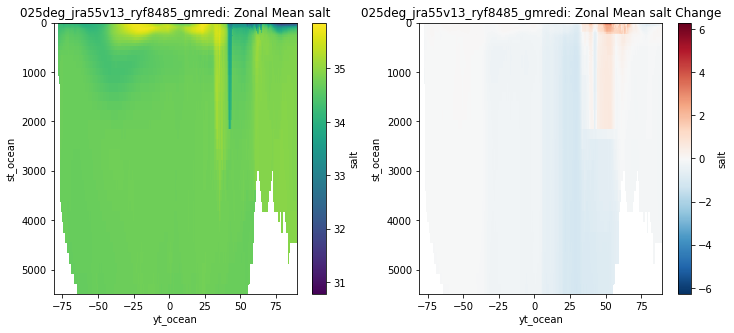

In [5]:
cc.plots.zonal_mean(esub,'salt',resolution=0.25)